In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

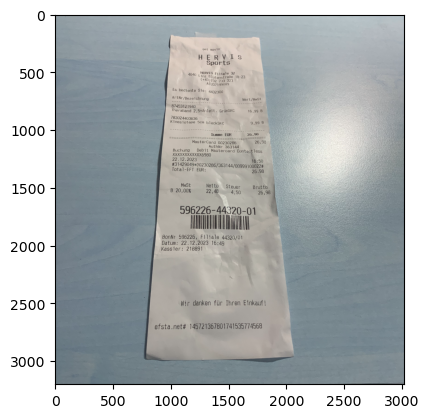

In [2]:
img = cv2.imread("test.jpg")
img = img[500:3700,:,:]
plt.imshow(img)
plt.show()

# 1. Morphological Operation

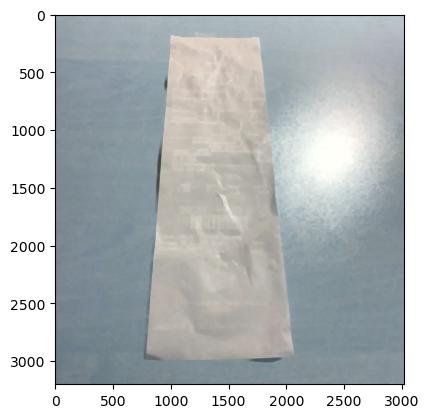

In [3]:
# Repeated Closing operation to remove text from the document.
kernel = np.ones((5,5),np.uint8)
whiteBill = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)
plt.imshow(whiteBill)

# 2.Magic of GrabCut

In [4]:
mask = np.zeros(whiteBill.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
bgdModel

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

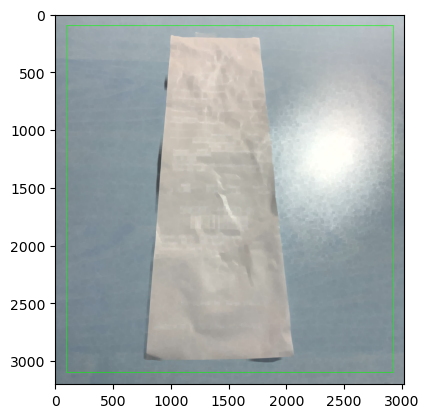

In [5]:
pad = 100
rect = (pad,pad,whiteBill.shape[1]-2*pad,whiteBill.shape[0]-2*pad)
whiteBill

imgRect = cv2.rectangle(whiteBill,rect,(0,255,0),3)
plt.imshow(imgRect)

In [10]:
(mask, bgModel, fgModel) = cv2.grabCut(
    whiteBill, mask, rect, bgdModel, fgdModel,
    iterCount=5,mode=cv2.GC_INIT_WITH_RECT)

In [ ]:
cv2.grabCut(whiteBill,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)